

**Dataset**: We'll be using the "Autistic Spectrum Disorder Screening Data for Children`s" public dataset from the UCI repository. The datset was donated by Prof. Fadi Thabtah, after being published in the article "Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment". You can find the article by Fadi Thabtah online. The data we investigate here consists of small changes to the original dataset, such as removing the 'age_desc' feature and records with missing or ill-formatted entries. Very few published articles are available online as the dataset has not been out for long and as a result refernce to a benchmark model is very rare.

**Abstract**:Autistic Spectrum Disorder (ASD) is a neurodevelopment condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.

The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of childrens that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.

**Sources**:

1) Tabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. Proceedings of the 1st International Conference on Medical and Health Informatics 2017, pp.1-6. Taichung City, Taiwan, ACM.

2) Thabtah, F. (2017). ASDTests. A mobile app for ASD screening. www.asdtests.com [accessed December 20th, 2017].

3) Thabtah, F. (2017). Machine Learning in Autistic Spectrum Disorder Behavioural Research: A Review. To Appear in Informatics for Health and Social Care Journal. December, 2017 (in press)



**Problem statement**: With available ASD data my goal is to make predictions regarding new patients and classify them into one of the two categories: "patient has ASD" or "patient does not have ASD".

**Type of problem**: It is a *binary classification* problem. We will be using *supervised machine learning* to refer to creating and using models that are learned from data i.e there are set of data labeled with correct answer for model to learn.

**Data overview**:

1)Data Type: Multivariate OR Univariate OR Sequential OR Time-Series OR Text OR Domain-Theory
Nominal / categorical, binary and continuous 

2)Task: Classification

3)Attribute Type: Categorical, continuous and binary  

4)Area: Medical, health and social science

5)Format Type: Non-Matrix

6)Does your data set contain missing values? Yes 

7)Number of Instances (records in your data set): 292

8)Number of Attributes (fields within each record): 21


**Models using**: 

* Logistic Regression
* Decision Trees
* Random Forest 
* SVM

It also aims to implements the one of the most effective in terms of correct classification or a combination of classifiers (*Ensemble learing*) like Random Forest to arrive at a decision. 

**Real world objective/constraints**:

1) The cost of misclassification is very high.

2) Interpretability is important.

3) No latency requirement.

**Metrics**:
In order to choose the appropriate model that avoids Underfitting or Overfitting the data we
will analyze the Bias-Variance Trade-Off, Model Complexity Graph, Learning Curves and Receiver Operator Characteristic Curves (ROC). To measure the effectiveness of each classification model we will study the accuracy score along with the precision, recall, F-Beta Score and confusion matrix.


## **Steps/Road Map**
* Step 0: Import Dataset/libraries.

* Step 1: Clean Datasets (The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers).

* Step 2: A quick visualization.

* Step 3: At First, I applied several Supervised Machine Learning (SML) techniques on the data for classification purpose.

* Step 4: Next, I experimented with different topologies, optimizers, and hyperparameters for different models.

* Step 5: Model tuning.

* Step 6: Feature Selection.

* Step 7: Then I built a Multi-Layer Perceptron and train it to classify indivisual with ASD based on its features.

* Step 8: Conclusion.


## Step 0: Import dataset

In [ ]:
#import libraries 
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/ASV
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import time as time
import os
from IPython.display import display # Allows the use of display() for DataFrame
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()

#pretty display for notebooks
%matplotlib inline

data = pd.read_csv("Autism_Data.arff")
print(data)

display(data.head(7))
!Is

In [ ]:
data.shape 
#Number of Instances (records in your data set): 292
#Number of Attributes (fields within each record): 21

(704, 21)

In [ ]:
# Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

#Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Total number of records
n_records = len(data.index)

#Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

print("Individuals diagonised with ASD: ",n_asd_yes)
print("Individuals not diagonised with ASD: ",n_asd_no)
print("Percentage of individuals diagonised with ASD: ", yes_percent)

Individuals diagonised with ASD:  189
Individuals not diagonised with ASD:  515
Percentage of individuals diagonised with ASD:  26.84659090909091


## Data preparation
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured — this is typically known as preprocessing. Unfortunately, for this dataset, there are many invalid or missing entries(?) we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

I use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names ():

In [ ]:
asd_data = pd.read_csv('Autism_Data.arff', na_values=['?'])
asd_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [ ]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [ ]:
data.info()
#we have 10 categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [ ]:
asd_data.info()
# Now we can see that missing values are randomly spread over the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [ ]:
data['gender'].value_counts()

asd_data['gender'].value_counts()

m    367
f    337
Name: gender, dtype: int64

In [ ]:
data["contry_of_res"].value_counts()

asd_data["contry_of_res"].value_counts()

'United States'           113
'United Arab Emirates'     82
'New Zealand'              81
India                      81
'United Kingdom'           77
                         ... 
China                       1
Chile                       1
Lebanon                     1
Burundi                     1
Cyprus                      1
Name: contry_of_res, Length: 67, dtype: int64

In [ ]:
data["relation"].value_counts()

asd_data["relation"].value_counts()

Self                          522
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: relation, dtype: int64

In [ ]:
data['Class/ASD'].value_counts()

asd_data["Class/ASD"].value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

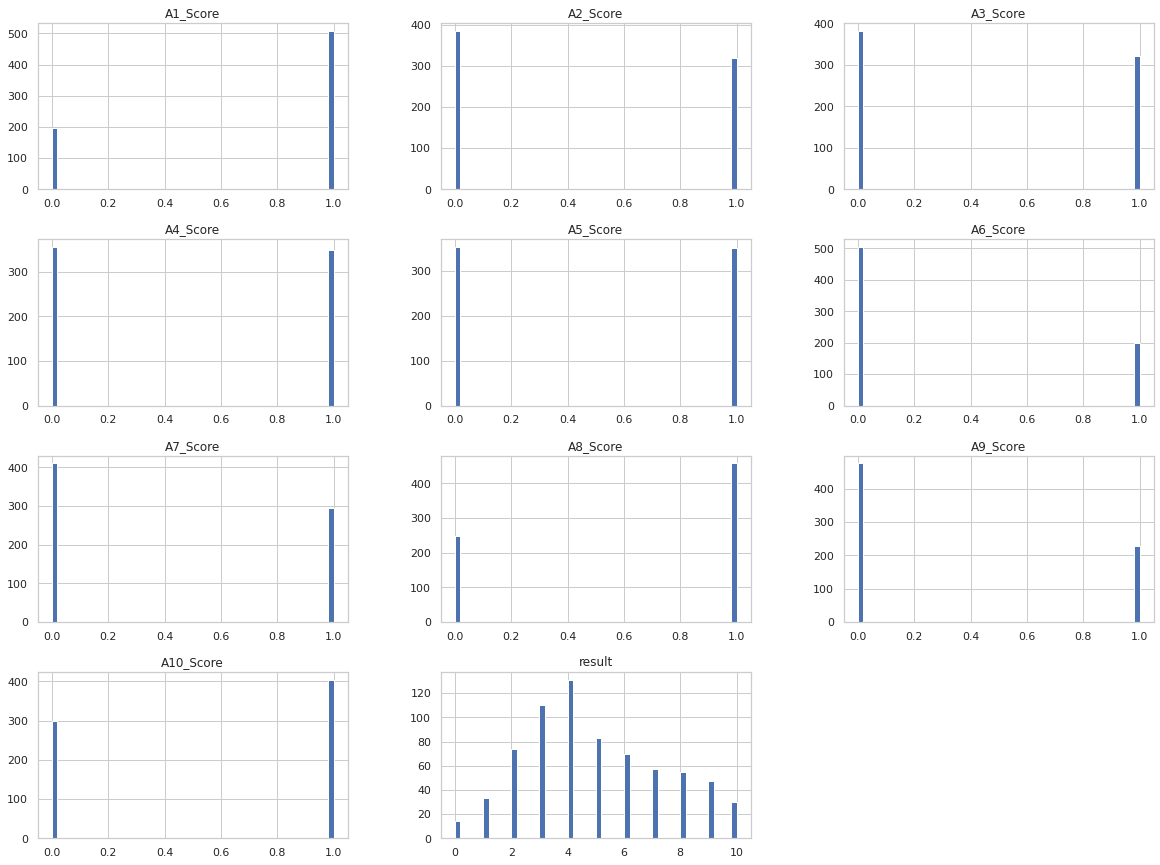

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

## Step 1: Cleaning data

In [ ]:
#since the missing data seems randomly distributed, I go ahead and drop rows with missing data.
#If we could have fill with median values for 'NaN' instead of dropping them, but in this situation that is little complicated as I have lot of categorical colums with 'NaN'.

asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
            |(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
12,0,1,1,1,1,1,0,0,1,0,...,f,NaN,no,no,Bahamas,no,6,'18 and more',NaN,NO
13,1,0,0,0,0,0,1,1,0,1,...,m,NaN,no,no,Austria,no,4,'18 and more',NaN,NO
14,1,0,0,0,0,0,1,1,0,1,...,f,NaN,no,no,Argentina,no,4,'18 and more',NaN,NO
19,0,0,0,0,0,0,1,1,0,1,...,m,NaN,yes,no,'United Arab Emirates',no,3,'18 and more',NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0,0,0,0,0,0,0,1,...,f,NaN,no,no,'United States',no,1,'18 and more',NaN,NO
658,0,0,1,1,0,0,1,0,0,0,...,m,NaN,no,no,Azerbaijan,no,3,'18 and more',NaN,NO
659,1,1,1,1,1,1,0,0,1,1,...,m,NaN,no,no,Pakistan,no,8,'18 and more',NaN,YES
666,0,0,0,0,0,0,0,1,0,0,...,m,NaN,no,no,Iraq,no,1,'18 and more',NaN,NO


## Step 2: Data visualization


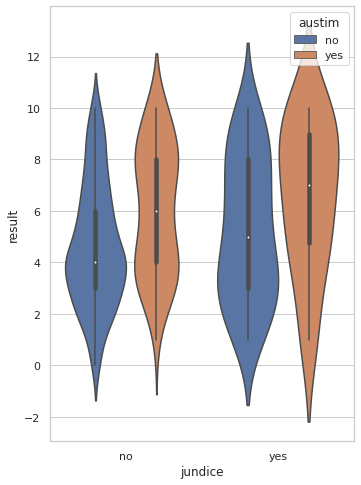

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'jundice', y = 'result',hue="austim", data = asd_data[0:])

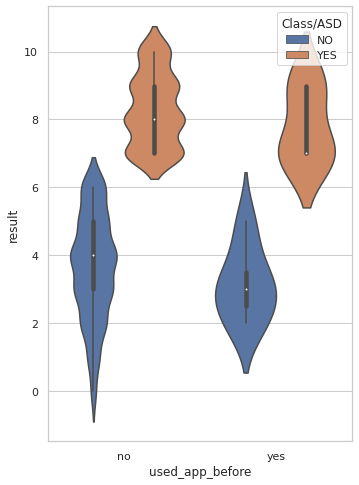

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'used_app_before', y = 'result',hue="Class/ASD", data = asd_data[0:])

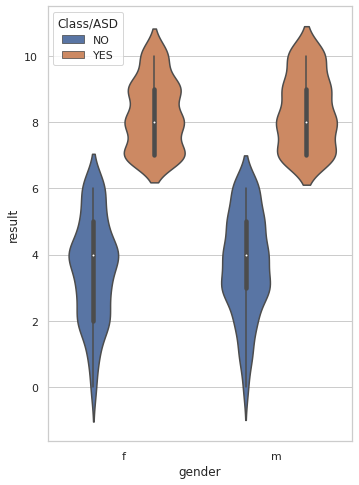

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'gender', y = 'result',hue="Class/ASD", data = asd_data[0:])

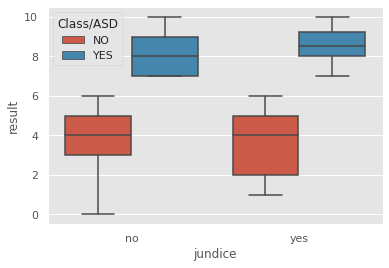

In [ ]:
plt.style.use("ggplot")
sns.boxplot(x = 'jundice',y = "result", hue="Class/ASD", data= asd_data)

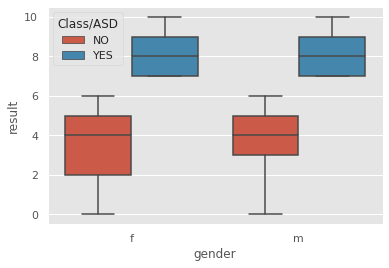

In [ ]:
plt.style.use("ggplot")
sns.boxplot(x = 'gender',y = "result", hue="Class/ASD", data= asd_data)

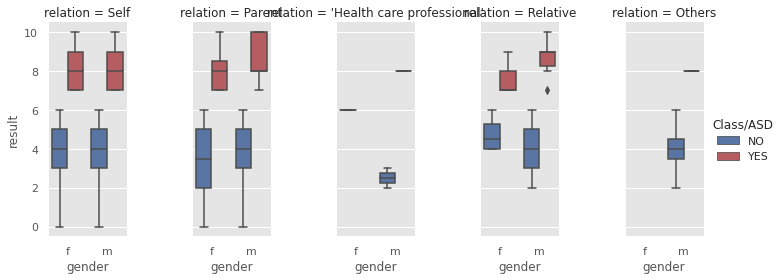

In [ ]:
sns.catplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=asd_data, kind ="box", height=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

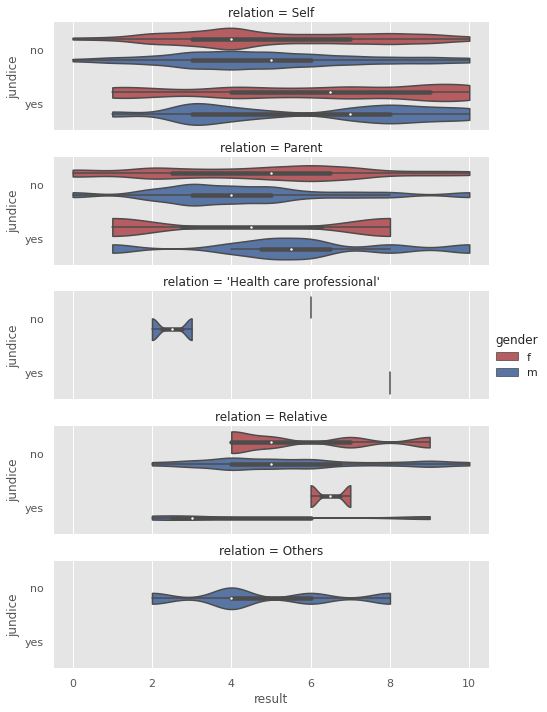

In [ ]:
g = sns.catplot(x="result", y="jundice",
                   hue="gender", row="relation",
                   data=asd_data,
                    orient="h", height=2, aspect=3.5, palette={'f': "r", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

In the two figures above, I have used two different depiction techniques to have a quick peek on the ASD dataset we are dealing with. Both of the occasions I have used catplot module from seaborn visualization software. In the first case, I used 'swamp' kind of graph expressing the relationship between several different features present in the data whereas in the second case, 'box' method was used to present the visual way of showing how different features were associated with each other.

Next I'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (class).

In [ ]:
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'used_app_before','relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

### Normalizing data using MinMaxScalar()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform

display(features_minmax_transform.head(n = 5))


,age,gender,ethnicity,jundice,austim,contry_of_res,result,used_app_before,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,'United States',0.6,no,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,0.5,no,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,0.8,no,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,'United States',0.6,no,Self,1,1,0,1,0,0,1,1,0,1
4,0.062842,f,NaN,no,no,Egypt,0.2,no,NaN,1,0,0,0,0,0,0,1,0,0


In [ ]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding. ".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)


,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_Uruguay,used_app_before_no,used_app_before_yes,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,0.6,1,1,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,0.019126,0.5,1,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0.027322,0.8,1,1,0,1,1,0,1,1,...,0,0,0,1,0,0,0,1,0,0
3,0.049180,0.6,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,0.062842,0.2,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


103 total features after one-hot encoding. 
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'", 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', "contry_of_res_'Costa Rica'", "contry_of_res_'Czech Republic'", "contry_of_res_'Hong Kong'", "contry_of_res_'New Zealand'", "contry_of_res_'Saudi Arabia'", "contry_of_res_'Sierra Leone'", "contry_of_res_'South Africa'", "contry_of_res_'Sri Lanka'", "contry_of_res_'United Arab Emirates'", "contry_of_res_'United Kingdom'", "contry_of_res_'United States'", "contry_of_res_'Viet Nam'", 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Argen

Text(0, 0.5, 'Frequency')

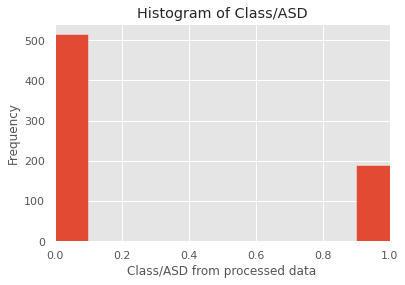

In [ ]:
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 563 samples.
Testing set has 141 samples.


In [ ]:
y_test[y_test==np.inf]=np.nan
y_test.fillna(y_test.mean(), inplace=True)

In [ ]:

X_train[X_train==np.inf]=np.nan
X_train.fillna(X_train.mean(), inplace=True)

## Step 3: Modelling

## *Evaluating Model* 

In [ ]:
y_pred_class = dectree.predict(X_test)

NotFittedError: ignored

In [ ]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0]


NameError: ignored

In [ ]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

NameError: ignored

## *Metrics*




### 1) Classification Accuracy

In [ ]:
print((TP + TN) / float(TP + TN + FP + FN))

NameError: ignored

### 2) Sensitivity

In [ ]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

NameError: ignored

### 3) Specificity

In [ ]:
specificity = TN / (TN + FP)

print(specificity)

NameError: ignored

### FPR

In [ ]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

NameError: ignored

### precision

1.   List item
2.   List item



In [ ]:
precision = TP / float(TP + FP)

#print(precision)
print(metrics.precision_score(y_test, y_pred_class))


NameError: ignored

In [ ]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
dectree.predict(X_test)[0:10]


NameError: ignored

In [ ]:
dectree.predict_proba(X_test)[0:10]

NameError: ignored

In [ ]:
# store the predicted probabilities for class 1
y_pred_prob = dectree.predict_proba(X_test)[:, 1]

NameError: ignored


dectree.score(X_test, y_test)

In [ ]:
asd_classes.replace([np.inf, -np.inf], np.nan, inplace=True)
features_final.replace([np.inf, -np.inf], np.nan, inplace=True)
asd_classes.fillna(asd_classes.mean(), inplace=True)
features_final.fillna(asd_classes.mean(), inplace=True)

### *Cross Validation*

In [ ]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=2)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

cv_scores.mean()

NameError: ignored

In [ ]:
## AUC SCORE : its a percentage of ROC plot
from sklearn.model_selection import cross_val_score
cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

NameError: ignored

### 1) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
ranfor.fit(X_train,y_train)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9900201207243461

In [ ]:

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()


0.9996867640443492

In [ ]:
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
fbeta_score(y_test, predictions_test, average='micro', beta=0.5)

0.9716312056737588

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cmk = confusion_matrix(y_test, y_pred)
print(ac)
print(cmk)

NameError: ignored

In [ ]:
import seaborn as sn
sn.set(font_scale=1.5)
sn.heatmap(cmk)
plt.show()

NameError: ignored

### 2) KNN(k-nearest neighbor)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
 

irisData = load_iris()
 
X = irisData.data
y = irisData.target
 

X_train, X_test, y_train, y_test = train_test_splite
             X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)

print(knn.predict(X_test))

IndentationError: ignored

In [ ]:
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cmk = confusion_matrix(y_test, y_pred)
print(ac)
print(cmk)


NameError: ignored

In [ ]:
import seaborn as sn
sn.set(font_scale=1.5)
sn.heatmap(cm)
plt.show()

NameError: ignored

# 3) Naive Bayes

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)
    
    # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
print(ac)
print(cm)

NameError: ignored

In [ ]:
import seaborn as sn
sn.set(font_scale=1.5)
sn.heatmap(cm)
plt.show()




NameError: ignored

### 4) SVM 

In [ ]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [ ]:

cv_scores = cross_val_score(svc, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

In [ ]:
#f1-beta score
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='micro', beta=0.5)

1.0

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cms = confusion_matrix(y_test, y_pred)
print(ac)
print(cms)

NameError: ignored

In [ ]:
import seaborn as sn
sn.set(font_scale=1.5)
sn.heatmap(cms)
plt.show()

NameError: ignored

In this GridSearchCV methos, we came up with the best result when the kernel was selected as linear.

# Conclusion
After exploring my ASD dataset with different kind of learning algorithms, I have arrived into this conclusion that all of my model work extremely well with the data. I have used three different metric (such as accuracy, AUC score and F-score) to measure the performance of my models, and it seems like all of the metric indicated an almost perfect classification of the ASD cases. Here I think the reason of this high performances with different models is the fact that only one of the feature is predominant over all others which I confirmed with the Feature Importance section in this notebook.

I think to build a more accurate model, we need to have access to more larger datasets. Here the number of instances after cleaning the data were not so sufficient enough so that I can claim that this model is optimum